In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [57]:
dataset = pd.read_csv("co2emission.csv")
dataset.head()

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
0,Afghanistan,1850,AFG,3752993.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1851,AFG,3767956.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.165,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,Afghanistan,1852,AFG,3783940.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.164,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
3,Afghanistan,1853,AFG,3800954.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.164,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
4,Afghanistan,1854,AFG,3818038.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.163,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [58]:
dataset.shape

(50598, 79)

In [59]:
new_data = dataset[["country", "year", "co2_per_capita"]]

new_data.tail()

,country,year,co2_per_capita
50593,Zimbabwe,2017,0.651
50594,Zimbabwe,2018,0.784
50595,Zimbabwe,2019,0.724
50596,Zimbabwe,2020,0.677
50597,Zimbabwe,2021,0.706


In [60]:
europe = new_data[new_data["country"].isin(["Albania","Austria","Andorra","Armenia","Azerbaijan",
                                            "Belarus","Belgium","Bosnia and Herzegovina","Bulgaria",
                                            "Croatia","Cyprus","Czechia",
                                            "Denmark",
                                            "Estonia",
                                            "Finland","France",
                                            "Georgia","Germany","Greece",
                                            "Hungary",
                                            "Iceland","Ireland","Italy",
                                            "Kazakhstan","Kosovo",
                                            "Latvia","Liechtenstein","Lithuania","Luxembourg",
                                            "Malta","Moldova","Montenegro",
                                            "Netherlands","North Macedonia","Norway",
                                            "Poland","Portugal",
                                            "Romania","Russia",
                                            "Serbia","Slovakia","Spain","Sweden","Switzerland",
                                           "Turkey",
                                           "Ukraine", "United Kingdom"])]
europe.head()

,country,year,co2_per_capita
788,Albania,1850,NaN
789,Albania,1851,NaN
790,Albania,1852,NaN
791,Albania,1853,NaN
792,Albania,1854,NaN


In [61]:
europe_data = europe.loc[(europe["year"] >= 1900)]
europe_data

,country,year,co2_per_capita
838,Albania,1900,NaN
839,Albania,1901,NaN
840,Albania,1902,NaN
841,Albania,1903,NaN
842,Albania,1904,NaN
...,...,...,...
47932,United Kingdom,2017,5.863
47933,United Kingdom,2018,5.716
47934,United Kingdom,2019,5.462
47935,United Kingdom,2020,4.865


In [62]:
print(europe_data.isnull())

       country   year  co2_per_capita
838      False  False            True
839      False  False            True
840      False  False            True
841      False  False            True
842      False  False            True
...        ...    ...             ...
47932    False  False           False
47933    False  False           False
47934    False  False           False
47935    False  False           False
47936    False  False           False

[5734 rows x 3 columns]


In [63]:
missing_counts = europe_data.isnull().sum()
print(missing_counts)

country             0
year                0
co2_per_capita    426
dtype: int64


In [64]:
europe.info()
europe.head()

<class 'pandas.core.frame.DataFrame'>
Index: 8708 entries, 788 to 47936
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country         8708 non-null   object 
 1   year            8708 non-null   int64  
 2   co2_per_capita  7380 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 272.1+ KB


,country,year,co2_per_capita
788,Albania,1850,NaN
789,Albania,1851,NaN
790,Albania,1852,NaN
791,Albania,1853,NaN
792,Albania,1854,NaN


In [65]:
grouped = europe_data.groupby(['country'])
mean_values = grouped.mean()
europe_data.loc[:,'co2_per_capita'] = grouped['co2_per_capita'].transform(lambda x: x.fillna(x.mean()))
europe_data

,country,year,co2_per_capita
838,Albania,1900,1.232888
839,Albania,1901,1.232888
840,Albania,1902,1.232888
841,Albania,1903,1.232888
842,Albania,1904,1.232888
...,...,...,...
47932,United Kingdom,2017,5.863000
47933,United Kingdom,2018,5.716000
47934,United Kingdom,2019,5.462000
47935,United Kingdom,2020,4.865000


In [66]:
# Group by 'year' and calculate the mean of 'co2_per_capita' within each year group
mean_by_year = europe_data.groupby('year')['co2_per_capita'].mean()

# Display the first 10 means per year
mean_by_year.head(10)


year
1900    2.395832
1901    2.375619
1902    2.365278
1903    2.400300
1904    2.419300
1905    2.426151
1906    2.514151
1907    2.627321
1908    2.707172
1909    2.663959
Name: co2_per_capita, dtype: float64

In [67]:
# Convert Series to DataFrame
df = mean_by_year.reset_index()

# Display the DataFrame
df


,year,co2_per_capita
0,1900,2.395832
1,1901,2.375619
2,1902,2.365278
3,1903,2.400300
4,1904,2.419300
...,...,...
117,2017,6.501851
118,2018,6.448809
119,2019,6.175596
120,2020,5.677936


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            122 non-null    int64  
 1   co2_per_capita  122 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 2.0 KB


In [69]:
# Convert 'year' column to datetime format without considering it as a timestamp
df['year'] = pd.to_datetime(df['year'], format='%Y')

print(df)
print(df.dtypes)

          year  co2_per_capita
0   1900-01-01        2.395832
1   1901-01-01        2.375619
2   1902-01-01        2.365278
3   1903-01-01        2.400300
4   1904-01-01        2.419300
..         ...             ...
117 2017-01-01        6.501851
118 2018-01-01        6.448809
119 2019-01-01        6.175596
120 2020-01-01        5.677936
121 2021-01-01        5.756660

[122 rows x 2 columns]
year              datetime64[ns]
co2_per_capita           float64
dtype: object


In [70]:
df

,year,co2_per_capita
0,1900-01-01,2.395832
1,1901-01-01,2.375619
2,1902-01-01,2.365278
3,1903-01-01,2.400300
4,1904-01-01,2.419300
...,...,...
117,2017-01-01,6.501851
118,2018-01-01,6.448809
119,2019-01-01,6.175596
120,2020-01-01,5.677936


In [71]:

#Convert 'year' column to integer type
#df['year'] = df['year'].dt.year


In [72]:
# Calculate IQR for column 'co2_per_capita'
Q1 = df['co2_per_capita'].quantile(0.25)
Q3 = df['co2_per_capita'].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
threshold = 1.5
outliers = df[(df['co2_per_capita'] < Q1 - threshold * IQR) | (df['co2_per_capita'] > Q3 + threshold * IQR)]
print(outliers)


Empty DataFrame
Columns: [year, co2_per_capita]
Index: []


In [73]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

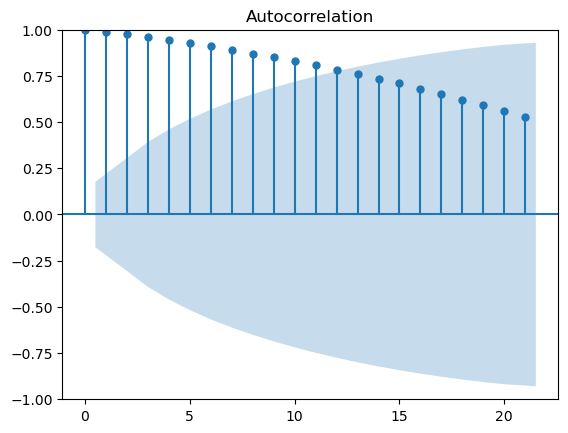

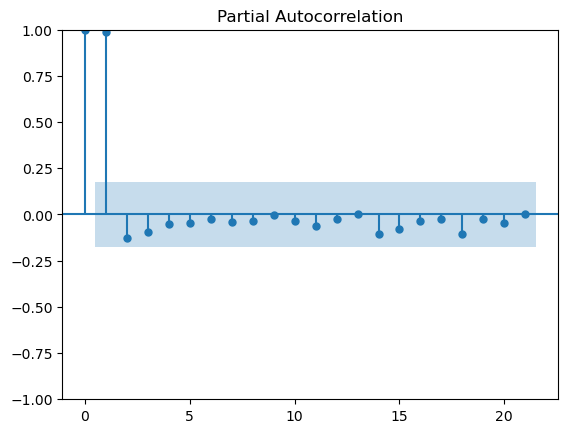

In [74]:
acf_original = plot_acf((df['co2_per_capita']))
pacf_original = plot_pacf((df['co2_per_capita']))

In [75]:
import statsmodels.api as sm

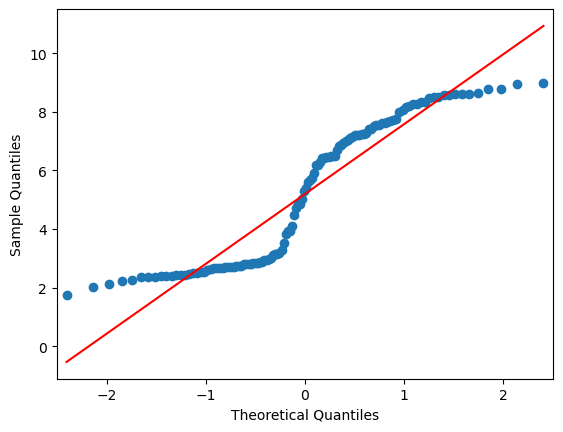

In [76]:
# qqplot for the 'Close' column
x = sm.qqplot(df['co2_per_capita'], line = 's')

In [77]:
adftest = adfuller(df['co2_per_capita'])
print("ADF Test Results")
print("Null Hypothesis: The series has a unit root (non-stationary)")
print("ADF-Statistic:", adftest[0])
print("P-Value:", adftest[1])
print("Number of lags:", adftest[2])
print("Number of observations:", adftest[3])
print("Critical Values:", adftest[4])
print("Note: If P-Value is smaller than 0.05, we reject the null hypothesis and the series is stationary")

ADF Test Results
Null Hypothesis: The series has a unit root (non-stationary)
ADF-Statistic: -1.1838322326020234
P-Value: 0.680511724082201
Number of lags: 1
Number of observations: 120
Critical Values: {'1%': -3.486055829282407, '5%': -2.8859430324074076, '10%': -2.5797850694444446}
Note: If P-Value is smaller than 0.05, we reject the null hypothesis and the series is stationary


In [78]:
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima

In [79]:
# A nested loop is written to calculate the AIC values
# The lowest AIC the better

aic_values=[]
for d in range(0,3):
    for ari in range(0, 3):
        for maj in range(0,3):
            try:
                arima_obj = ARIMA(df['co2_per_capita'], order=(ari,d,maj))
                arima_obj_fit = arima_obj.fit()
                aic_values.append([ari, d, maj, arima_obj_fit.aic])
            except ValueError:
                pass
print(aic_values)

[[0, 0, 0, 562.4703268416656], [0, 0, 1, 412.59735871315297], [0, 0, 2, 294.84797259976744], [1, 0, 0, -3.6224074584299686], [1, 0, 1, -9.31018275543472], [1, 0, 2, -9.425985832748779], [2, 0, 0, -11.327132836982074], [2, 0, 1, -16.000370760513054], [2, 0, 2, -16.68535109248187], [0, 1, 0, -11.407116814033158], [0, 1, 1, -17.01855697648189], [0, 1, 2, -17.061730746043274], [1, 1, 0, -18.949477465863918], [1, 1, 1, -20.100000189567357], [1, 1, 2, -19.080918533634875], [2, 1, 0, -18.50468642417404], [2, 1, 1, -19.16081959265658], [2, 1, 2, -17.19444192838876], [0, 2, 0, 33.98112121683988], [0, 2, 1, -16.822927324755028], [0, 2, 2, -16.58741047615775], [1, 2, 0, 10.719914321615752], [1, 2, 1, -16.729951968758222], [1, 2, 2, -14.814095276190965], [2, 2, 0, 2.8059454275459483], [2, 2, 1, -14.81369222909511], [2, 2, 2, -12.84113511540037]]


In [80]:
stepwise_fit = auto_arima(df['co2_per_capita'], trace = True,
                         suppress_warnings = True)

stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-15.347, Time=0.33 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-11.202, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-17.991, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-16.320, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-11.407, Time=0.03 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-17.301, Time=0.08 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-18.447, Time=0.11 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-17.316, Time=0.23 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-17.241, Time=0.20 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-16.132, Time=0.10 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-20.100, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-17.019, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-18.949, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-19.161, Time=0.19 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-19.0

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  122
Model:               SARIMAX(1, 1, 1)   Log Likelihood                  13.050
Date:                Tue, 14 May 2024   AIC                            -20.100
Time:                        22:17:07   BIC                            -11.713
Sample:                             0   HQIC                           -16.694
                                - 122                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8537      0.128      6.687      0.000       0.603       1.104
ma.L1         -0.6816      0.149     -4.567      0.000      -0.974      -0.389
sigma2         0.0471      0.004     11.879      0.000       0.039       0.055
===================================================================================
Ljung-Box (L1) (Q):                   0.25   Jarque-Bera (JB):                46.22
Prob(Q):                              0.62   Prob(JB):                         0.00
Heteroskedasticity (H):               3.15   Skew:                            -0.50
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.86
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

import statsmodels.api as sm

In [81]:
# Store one difference value of the 'co2 per capita' column
first_order_diff = df['co2_per_capita'].diff(1)
# Drop the first row of 'co2 per capita' column because It has 'NaN' value
first_order_diff = df['co2_per_capita'].diff(1).dropna()


# Display the first five records
first_order_diff.head()

1   -0.020213
2   -0.010340
3    0.035021
4    0.019000
5    0.006851
Name: co2_per_capita, dtype: float64

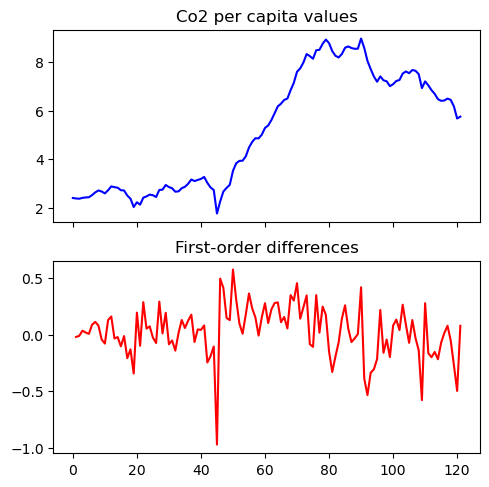

In [82]:
# Declare the fig abd ax as two arguments 
fig, ax = plt.subplots(2, sharex = True)
fig.set_size_inches(5.5, 5.5)
df['co2_per_capita'].plot(ax = ax[0], color = 'b')
ax[0].set_title('Co2 per capita values')
first_order_diff.plot(ax = ax[1], color = 'r')
ax[1].set_title('First-order differences');

In [83]:
model = ARIMA(df['co2_per_capita'].tolist(), order = (1, 1, 1))

model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  122
Model:                 ARIMA(1, 1, 1)   Log Likelihood                  13.050
Date:                Tue, 14 May 2024   AIC                            -20.100
Time:                        22:17:08   BIC                            -11.713
Sample:                             0   HQIC                           -16.694
                                - 122                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8537      0.128      6.687      0.000       0.603       1.104
ma.L1         -0.6816      0.149     -4.567      0.000      -0.974      -0.389
sigma2         0.0471      0.004     11.879      0.000       0.039       0.055
===================================================================================
Ljung-Box (L1) (Q):                   0.25   Jarque-Bera (JB):                46.22
Prob(Q):                              0.62   Prob(JB):                         0.00
Heteroskedasticity (H):               3.15   Skew:                            -0.50
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.86
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [84]:
# Declare the array 'pred' and append the values 
pred = model_fit.fittedvalues

# Add a new column 'ARIMA' into dataframe
df['ARIMA'] = pred

# Residues and fitted values are added and stored into dataframe
#diffval = model_fit.resid + model_fit.fittedvalues

# Add a column 'diffval' into dataframe
#df['diffval'] = diffval

# Display first five records
df.head()


,year,co2_per_capita,ARIMA
0,1900-01-01,2.395832,0.000000
1,1901-01-01,2.375619,2.395832
2,1902-01-01,2.365278,2.370785
3,1903-01-01,2.400300,2.360041
4,1904-01-01,2.419300,2.403302


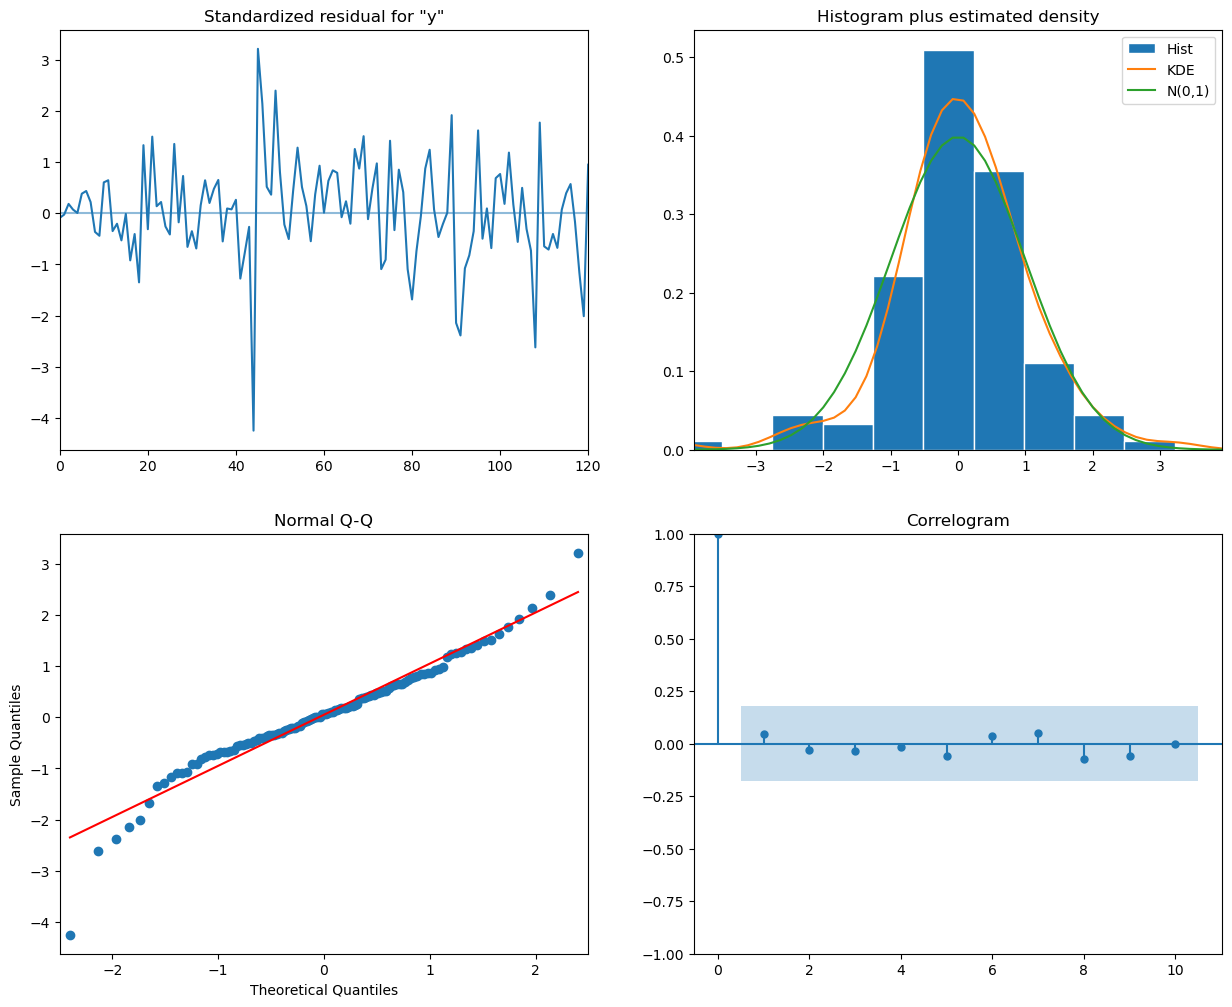

In [85]:
# Diagnosing the model residuals
model_fit.plot_diagnostics(figsize = (15, 12))
plt.show()

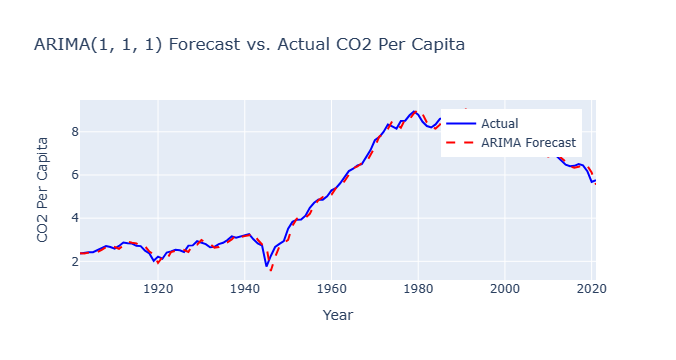

In [86]:
import plotly.graph_objs as go
# Set the index of the DataFrame to the 'Year' column
df.set_index('year', inplace=True)


# Create traces for actual and ARIMA forecast values
trace_actual = go.Scatter(x=df.index[2:], y=df['co2_per_capita'].iloc[2:], mode='lines', name='Actual', line=dict(color='blue'))
trace_arima = go.Scatter(x=df.index[2:], y=df['ARIMA'].iloc[2:], mode='lines', name='ARIMA Forecast', line=dict(color='red', dash='dash'))

# Create layout
layout = go.Layout(title='ARIMA(1, 1, 1) Forecast vs. Actual CO2 Per Capita',
                   xaxis=dict(title='Year'),
                   yaxis=dict(title='CO2 Per Capita'),
                   legend=dict(x=0.7, y=0.95))

# Combine traces and layout
fig = go.Figure(data=[trace_actual, trace_arima], layout=layout)

# Show plot
fig.show()


In [87]:
from sklearn.metrics import mean_squared_error

In [88]:
# Split the data into train and test
train_size = int(len(df) * 0.8)
train, test = df[0:train_size], df[train_size:len(df)]

In [89]:
# Fit the ARIMA model on the training dataset
model_train = ARIMA(train['co2_per_capita'], order=(1, 1, 1))
model_train_fit = model_train.fit()
model_train_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:         co2_per_capita   No. Observations:                   97
Model:                 ARIMA(1, 1, 1)   Log Likelihood                   9.331
Date:                Tue, 14 May 2024   AIC                            -12.662
Time:                        22:17:20   BIC                             -4.969
Sample:                    01-01-1900   HQIC                            -9.552
                         - 01-01-1996                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7422      0.179      4.146      0.000       0.391       1.093
ma.L1         -0.5027      0.208     -2.417      0.016      -0.910      -0.095
sigma2         0.0481      0.004     10.827      0.000       0.039       0.057
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                56.69
Prob(Q):                              0.89   Prob(JB):                         0.00
Heteroskedasticity (H):               2.85   Skew:                            -0.44
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.66
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [90]:
# Forecast on the test dataset
test_forecast = model_train_fit.get_forecast(steps=len(test))
test_forecast_series = pd.Series(test_forecast.predicted_mean, index=test.index)

In [91]:
# Make Predictionson Test Set

start = len(train)
end = len(train) + len(test) -1
pred = model_fit.predict(start = start, end = end, typ = 'levels')
#pred.index = df.index[start: end +1]
print(pred)

[7.36444881 7.19325603 7.16312845 6.94686523 7.06282898 7.22994802
 7.27719849 7.58512388 7.67205608 7.57228808 7.71707949 7.67079955
 7.50262723 6.82770971 7.18762675 7.00239113 6.7836054  6.62535402
 6.39326584 6.33803948 6.37787539 6.48442562 6.42780481 6.11427009
 5.55050845]


In [128]:
# Define the start and end dates for the future predictions
start_date = '2020-01-01'
end_date = pd.to_datetime(start_date) + pd.DateOffset(years=50)
# Generate future dates
future_index = pd.date_range(start=start_date, end=end_date, freq='Y')

# Make future predictions
forecast = model_fit.forecast(steps=len(future_index))

In [93]:
# Calculate the mean squared error
mse = mean_squared_error(test['co2_per_capita'], test_forecast_series)
rmse = mse**0.5
# Print RMSE
print('Test RMSE: %.3f' % rmse)

Test RMSE: 0.716


In [129]:
import plotly.graph_objs as go

# Create traces for actual and predicted values
trace_actual = go.Scatter(x=all_years[:len(train)+len(test)], y=df['co2_per_capita'][:len(train)+len(test)], mode='lines', name='Actual CO2 Per Capita (Test Set)', line=dict(color='blue', width=2))
trace_predicted_test = go.Scatter(x=test['year'], y=pred, mode='lines', name='Predicted CO2 Per Capita (Test Set)', line=dict(color='red', width=2, dash='dash'))
trace_predicted_future = go.Scatter(x=all_years[len(train)+len(test)-1:], y=all_pred[len(train)+len(test)-1:], mode='lines', name='Predicted CO2 Per Capita (Future)', line=dict(color='green', width=2, dash='dash'))

# Create layout
layout = go.Layout(title='Actual vs. Predicted CO2 Per Capita',
                   xaxis=dict(title='Year'),
                   yaxis=dict(title='CO2 Per Capita'),
                   legend=dict(x=0.7, y=0.95))

# Combine traces and layout
fig = go.Figure(data=[trace_actual, trace_predicted_test, trace_predicted_future], layout=layout)

# Show plot
fig.show()


KeyError: 'year'

In [113]:
import plotly.graph_objs as go

# Create traces for actual and predicted values
trace_actual = go.Scatter(x=all_years[:len(train)+len(test)], y=df['co2_per_capita'][:len(train)+len(test)], mode='lines', name='Actual CO2 Per Capita (Test Set)', line=dict(color='blue', width=2))
trace_predicted_test = go.Scatter(x=test['year'], y=pred, mode='lines', name='Predicted CO2 Per Capita (Test Set)', line=dict(color='red', width=2, dash='dash'))
trace_predicted_future = go.Scatter(x=all_years[len(train)+len(test)-1:], y=all_pred[len(train)+len(test)-1:], mode='lines', name='Predicted CO2 Per Capita (Future)', line=dict(color='green', width=2, dash='dash'))

# Create layout
layout = go.Layout(title='Actual vs. Predicted CO2 Per Capita',
                   xaxis=dict(title='Year'),
                   yaxis=dict(title='CO2 Per Capita'),
                   legend=dict(x=0.7, y=0.95))

# Combine traces and layout
fig = go.Figure(data=[trace_actual, trace_predicted_test, trace_predicted_future], layout=layout)

# Show plot
fig.show()


KeyError: 'year'

KeyError: 'year'

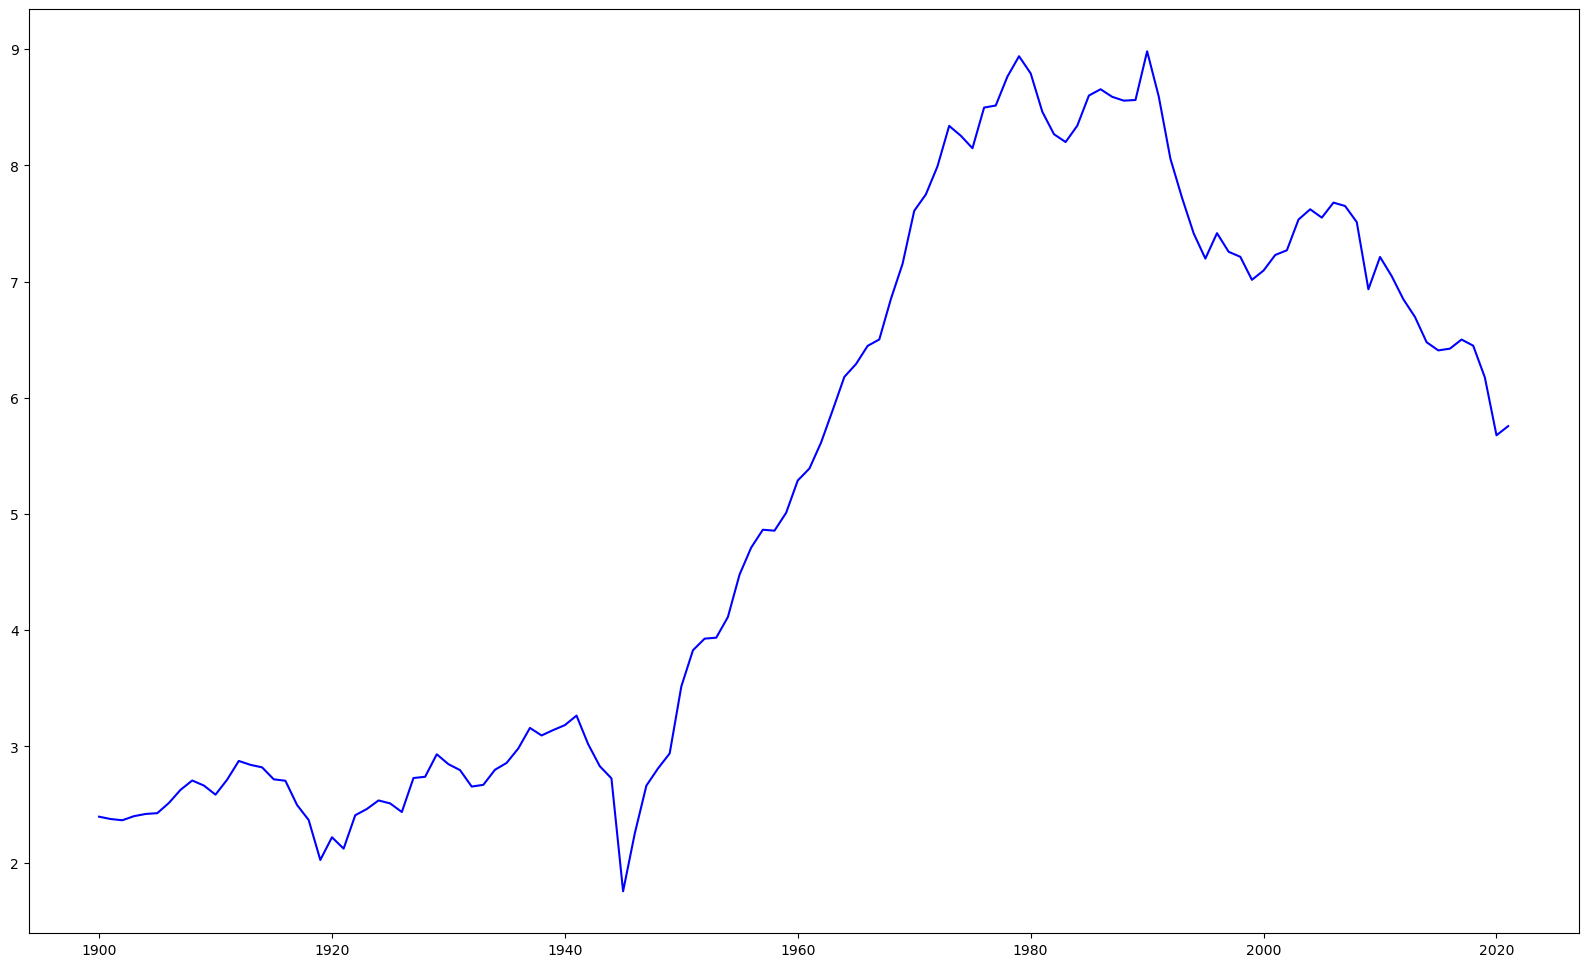

In [114]:
# Plot actual and predicted values
plt.figure(figsize=(20, 12))

# Plot actual CO2 Per Capita
plt.plot(all_years[:len(train)+len(test)], df['co2_per_capita'][:len(train)+len(test)], label='Actual CO2 Per Capita (Test Set)', color='blue', linestyle='-')

# Plot predicted CO2 Per Capita for the test set
plt.plot(test['year'], pred, label='Predicted CO2 Per Capita (Test Set)', color='red', linestyle='--')

# Plot predicted CO2 Per Capita for the future
plt.plot(all_years[len(train)+len(test)-1:], all_pred[len(train)+len(test)-1:], label='Predicted CO2 Per Capita (Future)', color='green', linestyle='--')

plt.xlabel('Year')
plt.ylabel('CO2 Per Capita')
plt.title('Actual vs. Predicted CO2 Per Capita')
plt.legend()
plt.grid(True)
plt.show()


In [115]:
# Plot actual and predicted values
plt.figure(figsize=(20, 12))

# Plot actual CO2 Per Capita
plt.plot(test['year'], test['co2_per_capita'], label='Actual CO2 Per Capita', color='blue', linestyle='-')

# Plot predicted CO2 Per Capita for the test set
plt.plot(test['year'], pred, label='Predicted CO2 Per Capita (Test Set)', color='red', linestyle='--')

# Plot predicted CO2 Per Capita for the future
plt.plot(all_years[len(train)+len(test)-1:], all_pred[len(train)+len(test)-1:], label='Predicted CO2 Per Capita (Future)', color='green', linestyle='--')

plt.xlabel('Year')
plt.ylabel('CO2 Per Capita')
plt.title('Actual vs. Predicted CO2 Per Capita')
plt.legend()
plt.grid(True)
plt.show()


KeyError: 'year'

<Figure size 2000x1200 with 0 Axes>

In [116]:
import plotly.graph_objs as go

# Create traces for actual and predicted values
trace_actual = go.Scatter(x=all_years[:len(train)+len(test)], y=all_pred[:len(train)+len(test)], mode='lines', name='Actual CO2 Per Capita (Historical Data)', line=dict(color='blue'))
trace_predicted_test = go.Scatter(x=test['year'], y=pred, mode='lines', name='Predicted CO2 Per Capita (Test Set)', line=dict(color='red', dash='dash'))
trace_predicted_future = go.Scatter(x=all_years[len(train)+len(test)-1:], y=all_pred[len(train)+len(test)-1:], mode='lines', name='Predicted CO2 Per Capita (Future)', line=dict(color='red', dash='dash'))

# Create layout
layout = go.Layout(title='Actual vs. Predicted CO2 Per Capita',
                   xaxis=dict(title='Year'),
                   yaxis=dict(title='CO2 Per Capita'),
                   legend=dict(x=0.7, y=0.95))

# Combine traces and layout
fig = go.Figure(data=[trace_actual, trace_predicted_future], layout=layout)

# Show plot
fig.show()


KeyError: 'year'

In [119]:
# Define the start and end dates for the future predictions
start_date = '2020-01-01'
end_date = pd.to_datetime(start_date) + pd.DateOffset(years=50)

# Generate future dates
future_index = pd.date_range(start=start_date, end=end_date, freq='Y')

# Make future predictions
forecast = model_fit.forecast(steps=len(future_index))

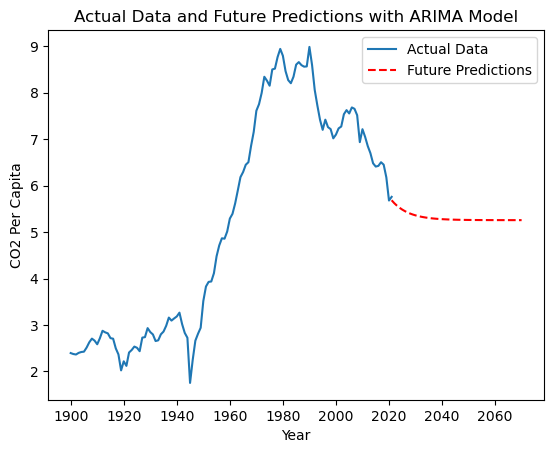

In [120]:

# Plot your existing data
plt.plot(df.index, df['co2_per_capita'], label='Actual Data')

# Plot the future predictions
plt.plot(future_index, forecast, color='r', linestyle='--', label='Future Predictions')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('CO2 Per Capita')
plt.title('Actual Data and Future Predictions with ARIMA Model')
plt.legend()

# Show plot
plt.show()

In [121]:

# Make future predictions
future_periods = 10  # Number of future periods to predict
forecast = model_fit.forecast(steps=future_periods)

# Print or use the forecasted values
print(forecast)

[5.68335101 5.62077072 5.56734868 5.52174463 5.48281446 5.44958148
 5.42121195 5.39699414 5.37632045 5.35867223]


In [123]:
forecast

array([5.68335101, 5.62077072, 5.56734868, 5.52174463, 5.48281446,
       5.44958148, 5.42121195, 5.39699414, 5.37632045, 5.35867223])

In [124]:
import plotly.graph_objects as go

# Create traces for actual data, ARIMA forecast, and future predictions
trace_actual = go.Scatter(x=df['year'], y=df['co2_per_capita'], mode='lines', name='Actual Data', line=dict(color='blue'))
trace_arima = go.Scatter(x=df['year'], y=df['Arima'], mode='lines', name='ARIMA Forecast', line=dict(color='red', dash='dash'))
trace_future = go.Scatter(x=future_index, y=forecast, mode='lines', name='Future Predictions', line=dict(color='green', dash='dash'))

# Combine traces into a data list
data = [trace_actual, trace_arima, trace_future]

# Create layout with title and axis labels
layout = go.Layout(title='CO2 Per Capita: Actual, ARIMA Forecast, and Future Predictions',
                   xaxis=dict(title='Year'),
                   yaxis=dict(title='CO2 Per Capita'))

# Create figure with data and layout
fig = go.Figure(data=data, layout=layout)

# Show dynamic plot
fig.show()


KeyError: 'year'

In [125]:
from sklearn.metrics import mean_squared_error
from numpy import sqrt

# Compute RMSE
rmse = sqrt(mean_squared_error(df['co2_per_capita'], predictions))

# Print RMSE
print('Test RMSE: %.3f' % rmse)


NameError: name 'predictions' is not defined

In [126]:
# Fit ARIMA model
model = ARIMA(df['co2_per_capita'], order=(1, 1, 1))
model_fit = model.fit()

# Generate forecasts
forecast_values = model_fit.forecast(steps=len(df))

# Add forecasts to DataFrame
df['arima_forecast'] = forecast_values

# Print model summary
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:         co2_per_capita   No. Observations:                  122
Model:                 ARIMA(1, 1, 1)   Log Likelihood                  13.050
Date:                Tue, 14 May 2024   AIC                            -20.100
Time:                        22:41:45   BIC                            -11.713
Sample:                    01-01-1900   HQIC                           -16.694
                         - 01-01-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8537      0.128      6.687      0.000       0.603       1.104
ma.L1         -0.6816      0.149     -4.567      0.000      -0.974      -0.389
sigma2         0.0471      0.004     11.879      0.0

In [ ]:
pyplot.plot(test)
pyplot.plot(predictions, color = 'red')
pyplot.show()